In [37]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/NLMCXR_png.zip' -d '/content'

In [2]:
df = pd.read_csv("/content/drive/My Drive/final_df.csv")

In [3]:
df

,Frontal,Lateral,Actual,Predicted
0,CXR1009_IM-0010-1001.png,CXR1009_IM-0010-2001.png,no acute cardiopulmonary abnormality,no acute cardiopulmonary process
1,CXR252_IM-1038-1001.png,CXR252_IM-1038-2001.png,no acute cardiopulmonary disease,no acute cardiopulmonary process
2,CXR3735_IM-1866-1001.png,CXR3735_IM-1866-2001.png,no acute process,no focal atelectasis
3,CXR1369_IM-0238-1001.png,CXR1369_IM-0238-2001.png,unremarkable examination of the chest,no acute cardiopulmonary process
4,CXR3231_IM-1528-1001.png,CXR3231_IM-1528-2001.png,no acute pulmonary abnormality abnormal appea...,no acute cardiopulmonary process
...,...,...,...,...
1215,CXR3342_IM-1603-1001.png,CXR3342_IM-1603-2001.png,persistent cardiomegaly and patchy bibasilar ...,no acute cardiopulmonary injury no acute card...
1216,CXR2174_IM-0787-1001.png,CXR2174_IM-0787-2001.png,unremarkable radiographs of the chest,no acute cardiopulmonary injury no acute card...
1217,CXR2229_IM-0831-1001.png,CXR2229_IM-0831-1002.png,no acute radiographic cardiopulmonary process,no acute cardiopulmonary process
1218,CXR786_IM-2326-1001.png,CXR786_IM-2326-1001.png,small calcified granulomas in in right upper ...,findings


In [16]:
bleu_score = []
for i,j in zip(df['Actual'],df['Predicted']) :
  #print(i,j)
  bleu_score.append(sentence_bleu([i.split()], j.split(), weights=(0.25, 0.25, 0.25, 0.25)))


In [23]:
df["bleu_score"] = bleu_score

# Images with less Bleu score:

In [97]:
df[df["bleu_score"]<0.005]

,Frontal,Lateral,Actual,Predicted,bleu_score
3,CXR1369_IM-0238-1001.png,CXR1369_IM-0238-2001.png,unremarkable examination of the chest,no acute cardiopulmonary process,0.0
7,CXR1566_IM-0369-1001.png,CXR1566_IM-0369-1001.png,no impression,findings,0.0
10,CXR690_IM-2258-1001.png,CXR690_IM-2258-1001.png,no acute cardiopulmonary abnormality,findings,0.0
13,CXR1015_IM-0001-1001.png,CXR1015_IM-0001-2001.png,bibasilar opacities right greater than left f...,no acute cardiopulmonary process,0.0
18,CXR3609_IM-1782-2001.png,CXR3609_IM-1782-3001.png,borderline cardiomegaly otherwise unremarkabl...,no acute cardiopulmonary injuries are clear l...,0.0
...,...,...,...,...,...
1207,CXR105_IM-0037-1001.png,CXR105_IM-0037-2001.png,bilateral effusions,no focal atelectasis,0.0
1209,CXR646_IM-2225-1001.png,CXR646_IM-2225-1001.png,normal chest exam,no acute cardiopulmonary abnormality,0.0
1215,CXR3342_IM-1603-1001.png,CXR3342_IM-1603-2001.png,persistent cardiomegaly and patchy bibasilar ...,no acute cardiopulmonary injury no acute card...,0.0
1216,CXR2174_IM-0787-1001.png,CXR2174_IM-0787-2001.png,unremarkable radiographs of the chest,no acute cardiopulmonary injury no acute card...,0.0


40% data has score less than 0.1 

In [98]:
df1 = df[df["bleu_score"]<0.05]

In [99]:
count = 0 
img_data = []
for i,j in zip(df1['Frontal'],df1['Lateral']):
  count += 1
  img_data.append([i,j])
  if count > 17:
    break;

In [100]:
import numpy as np
img_data = np.array(img_data)

In [101]:
img_data.shape

(18, 2)

In [102]:
img_data = img_data.reshape(6,6)

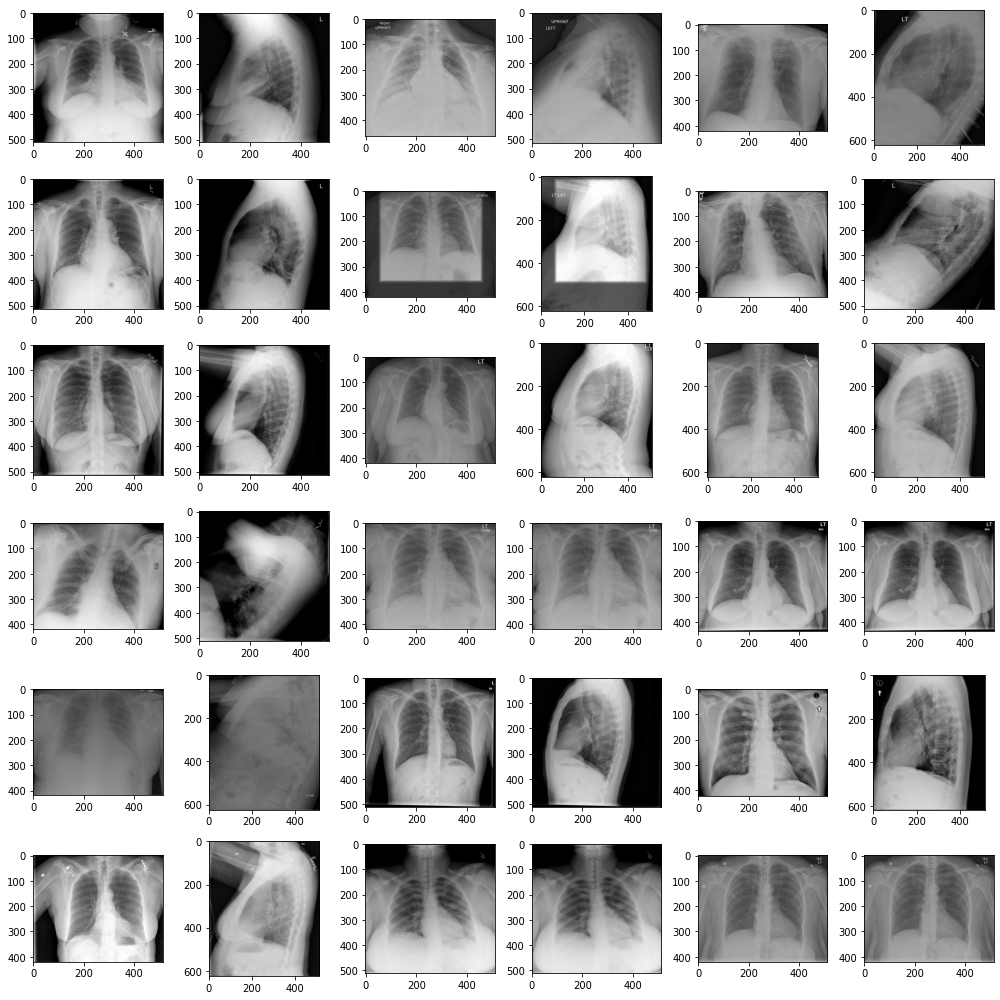

In [103]:
fig, axs = plt.subplots(6,6, figsize = (14,14), tight_layout=True)
count = 0
for img, subplot in zip(img_data, axs.flatten()):
  for i in range(len(img)) :
    img_=mpimg.imread("/content/NLMCXR_png/"+img[i])
    imgplot = axs[count-1,i].imshow(img_, cmap = 'bone')
  count += 1

There are duplications in our data and quality of lateral view image is less.
Image which have more brightness and very less brightness has issues in predicting. 

# Images with high bleu score:

In [104]:
df[df["bleu_score"]>0.7]

,Frontal,Lateral,Actual,Predicted,bleu_score
0,CXR1009_IM-0010-1001.png,CXR1009_IM-0010-2001.png,no acute cardiopulmonary abnormality,no acute cardiopulmonary process,0.707107
1,CXR252_IM-1038-1001.png,CXR252_IM-1038-2001.png,no acute cardiopulmonary disease,no acute cardiopulmonary process,0.707107
2,CXR3735_IM-1866-1001.png,CXR3735_IM-1866-2001.png,no acute process,no focal atelectasis,0.759836
5,CXR430_IM-2071-1001.png,CXR430_IM-2071-2001.png,no acute cardiopulmonary disease,no acute cardiopulmonary process,0.707107
9,CXR1926_IM-0600-1001.png,CXR1926_IM-0600-2001.png,no active disease,no focal atelectasis,0.759836
...,...,...,...,...,...
1178,CXR1434_IM-0279-1001.png,CXR1434_IM-0279-2001.png,no active disease,no acute cardiopulmonary process,0.707107
1188,CXR2198_IM-0808-1001.png,CXR2198_IM-0808-2001.png,no acute cardiopulmonary disease,no acute cardiopulmonary process,0.707107
1197,CXR1482_IM-0313-1001.png,CXR1482_IM-0313-1001.png,no acute cardiopulmonary findings,no acute cardiopulmonary abnormality,0.707107
1201,CXR125_IM-0169-1001.png,CXR125_IM-0169-2001.png,no acute disease,no focal atelectasis,0.759836


In [105]:
df2 = df[df["bleu_score"]>0.7]
count = 0 
img_data = []
for i,j in zip(df2['Frontal'],df2['Lateral']):
  count += 1
  img_data.append([i,j])
  if count > 17:
    break;

In [106]:
import numpy as np
img_data = np.array(img_data)
img_data = img_data.reshape(6,6)

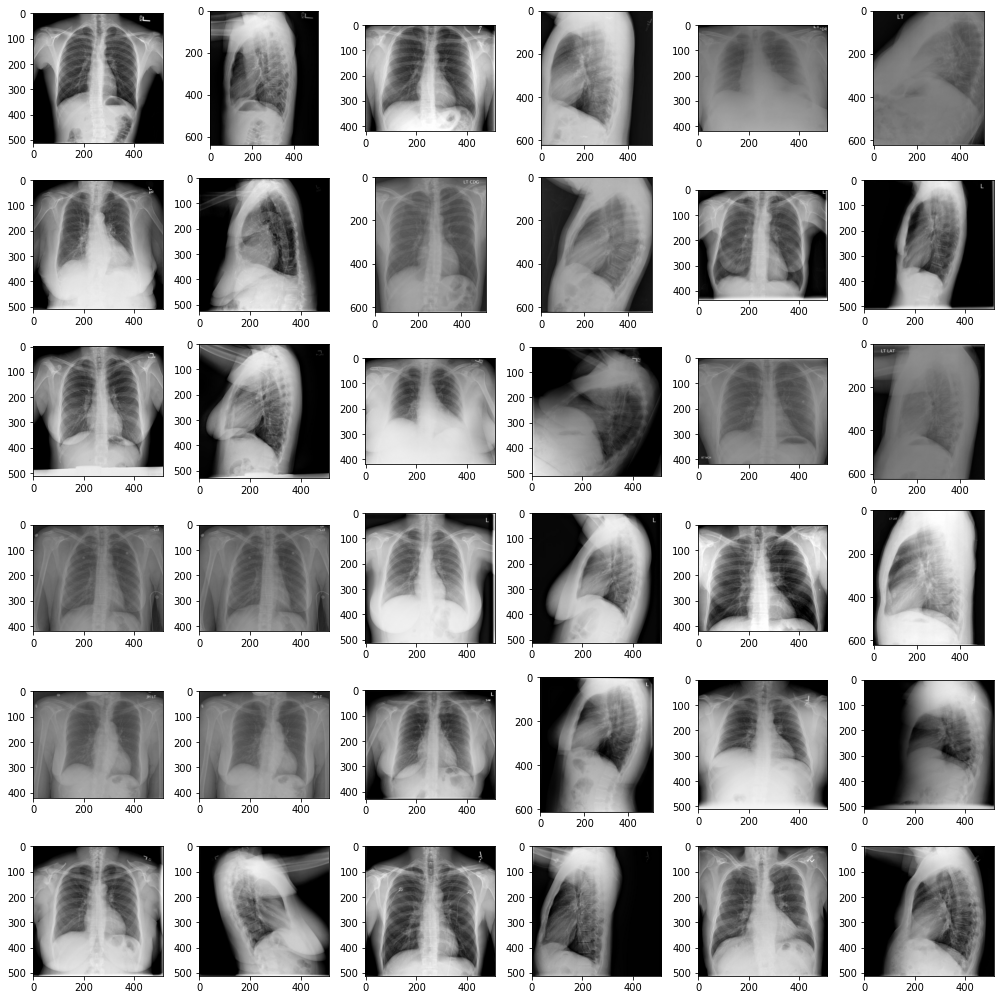

In [107]:
fig, axs = plt.subplots(6,6, figsize = (14,14), tight_layout=True)
count = 0
for img, subplot in zip(img_data, axs.flatten()):
  for i in range(len(img)) :
    img_=mpimg.imread("/content/NLMCXR_png/"+img[i])
    imgplot = axs[count-1,i].imshow(img_, cmap = 'bone')
  count += 1

Quality of images are much clearer when compared with images of less bleu score.
Brightness and Lateral views are perfect for model to predict.

In [111]:
df3 = df[df["bleu_score"]==0.0]

In [112]:
df3['Actual']

3                  unremarkable examination of the chest 
7                                          no impression 
10                  no acute cardiopulmonary abnormality 
13       bibasilar opacities right greater than left f...
18       borderline cardiomegaly otherwise unremarkabl...
                              ...                        
1207                                 bilateral effusions 
1209                                   normal chest exam 
1215     persistent cardiomegaly and patchy bibasilar ...
1216               unremarkable radiographs of the chest 
1218     small calcified granulomas in in right upper ...
Name: Actual, Length: 310, dtype: object

In [113]:
print(' '.join(df3['Actual'].values))

 unremarkable examination of the chest   no impression   no acute cardiopulmonary abnormality   bibasilar opacities right greater than left features suggest a combination of consolidation and atelectasis   borderline cardiomegaly otherwise unremarkable exam   small left pleural effusion   mild cardiomegaly with subsegmental atelectasis in the right lower lobe   small left pleural effusion with left basilar atelectasis   negative for acute abnormality   clear lungs stable hiatal hernia   increased bilateral interstitial opacity consistent with mild interstitial edema   normal chest   heart size normal and lungs are clear old healed left lateral rib fractures   nodular density seen on the pa view only projecting in the right midlung recommend noncontrasted enhanced for evaluation of this nodule does this patient have known factors for malignancy somewhat indistinct pulmonary interstitium possibly reflecting underlying pulmonary sarcoidosis   left sided small pleural effusion versus extra

These words occur in very less number of times in our data.
Model is not able to predict same as actual impression.


# Conclusion:

Best Predictions :
1. Have clear images with right amount of brightness and lateral views.
2. Words also occur in several times and model could be able to predict.

Worst Predictions :
1. Has Duplication of frontal and lateral views in data.
2. Words occurs in rare.
3. Has too less brightness or more brightness